# Car Price Prediction


In this Notebook we will be building a model to predict Car Price. In doing so, we would be going through the life cycle of a data science project. Data is given from Kaggle.

Here's the link to the dataset: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

So, Let's begin...

* Import Libraries
* Load Train Data
* Basic EDA
* Handling Categorical Data
* Data Cleaning
* Split The Data
* Feature Selection
  * Feature Importance using ExtraTreeRegressor
* Model Building
  * RandomForestRegressor

# Import Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


# Load Train Data

In [2]:
df = pd.read_csv('../input/vehicle-dataset-from-cardekho/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Basic EDA

In [3]:
#check the shape of the data
df.shape

(301, 9)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


As we can see we have some categorical data, which we need to convert.

In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Data Cleaning

In [7]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

dropping car_name column as it is not gonna help us with the accuracy

In [8]:
data = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


create a column for current year, and subtract the year column to get the age of the car.

In [9]:
data['Current_Year'] = 2021
data['Car_Age'] = data.Current_Year - data.Year
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Car_Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


now that we have the age of the car, we can drop the Year, Current_Year columns

In [10]:
data.drop(['Current_Year'], axis = 1, inplace = True)
data.drop(['Year'], axis = 1, inplace = True)
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


# Handling Categorical Columns

These are the categorical columns

In [4]:
print(f'Seller_Type: {df.Seller_Type.unique()} , \nTransmission: {df.Transmission.unique()} , \nFuel_Type: {df.Fuel_Type.unique()} , \nOwner: {df.Owner.unique()}')

Seller_Type: ['Dealer' 'Individual'] , 
Transmission: ['Manual' 'Automatic'] , 
Fuel_Type: ['Petrol' 'Diesel' 'CNG'] , 
Owner: [0 1 3]


convert categorical values to numerical

In [11]:
data = pd.get_dummies(data, drop_first = True)
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


Let's find the correlation

In [12]:
data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Car_Age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


Let's plot the data for better understanding

In [13]:
import seaborn as sns                                   
import matplotlib.pyplot as plt

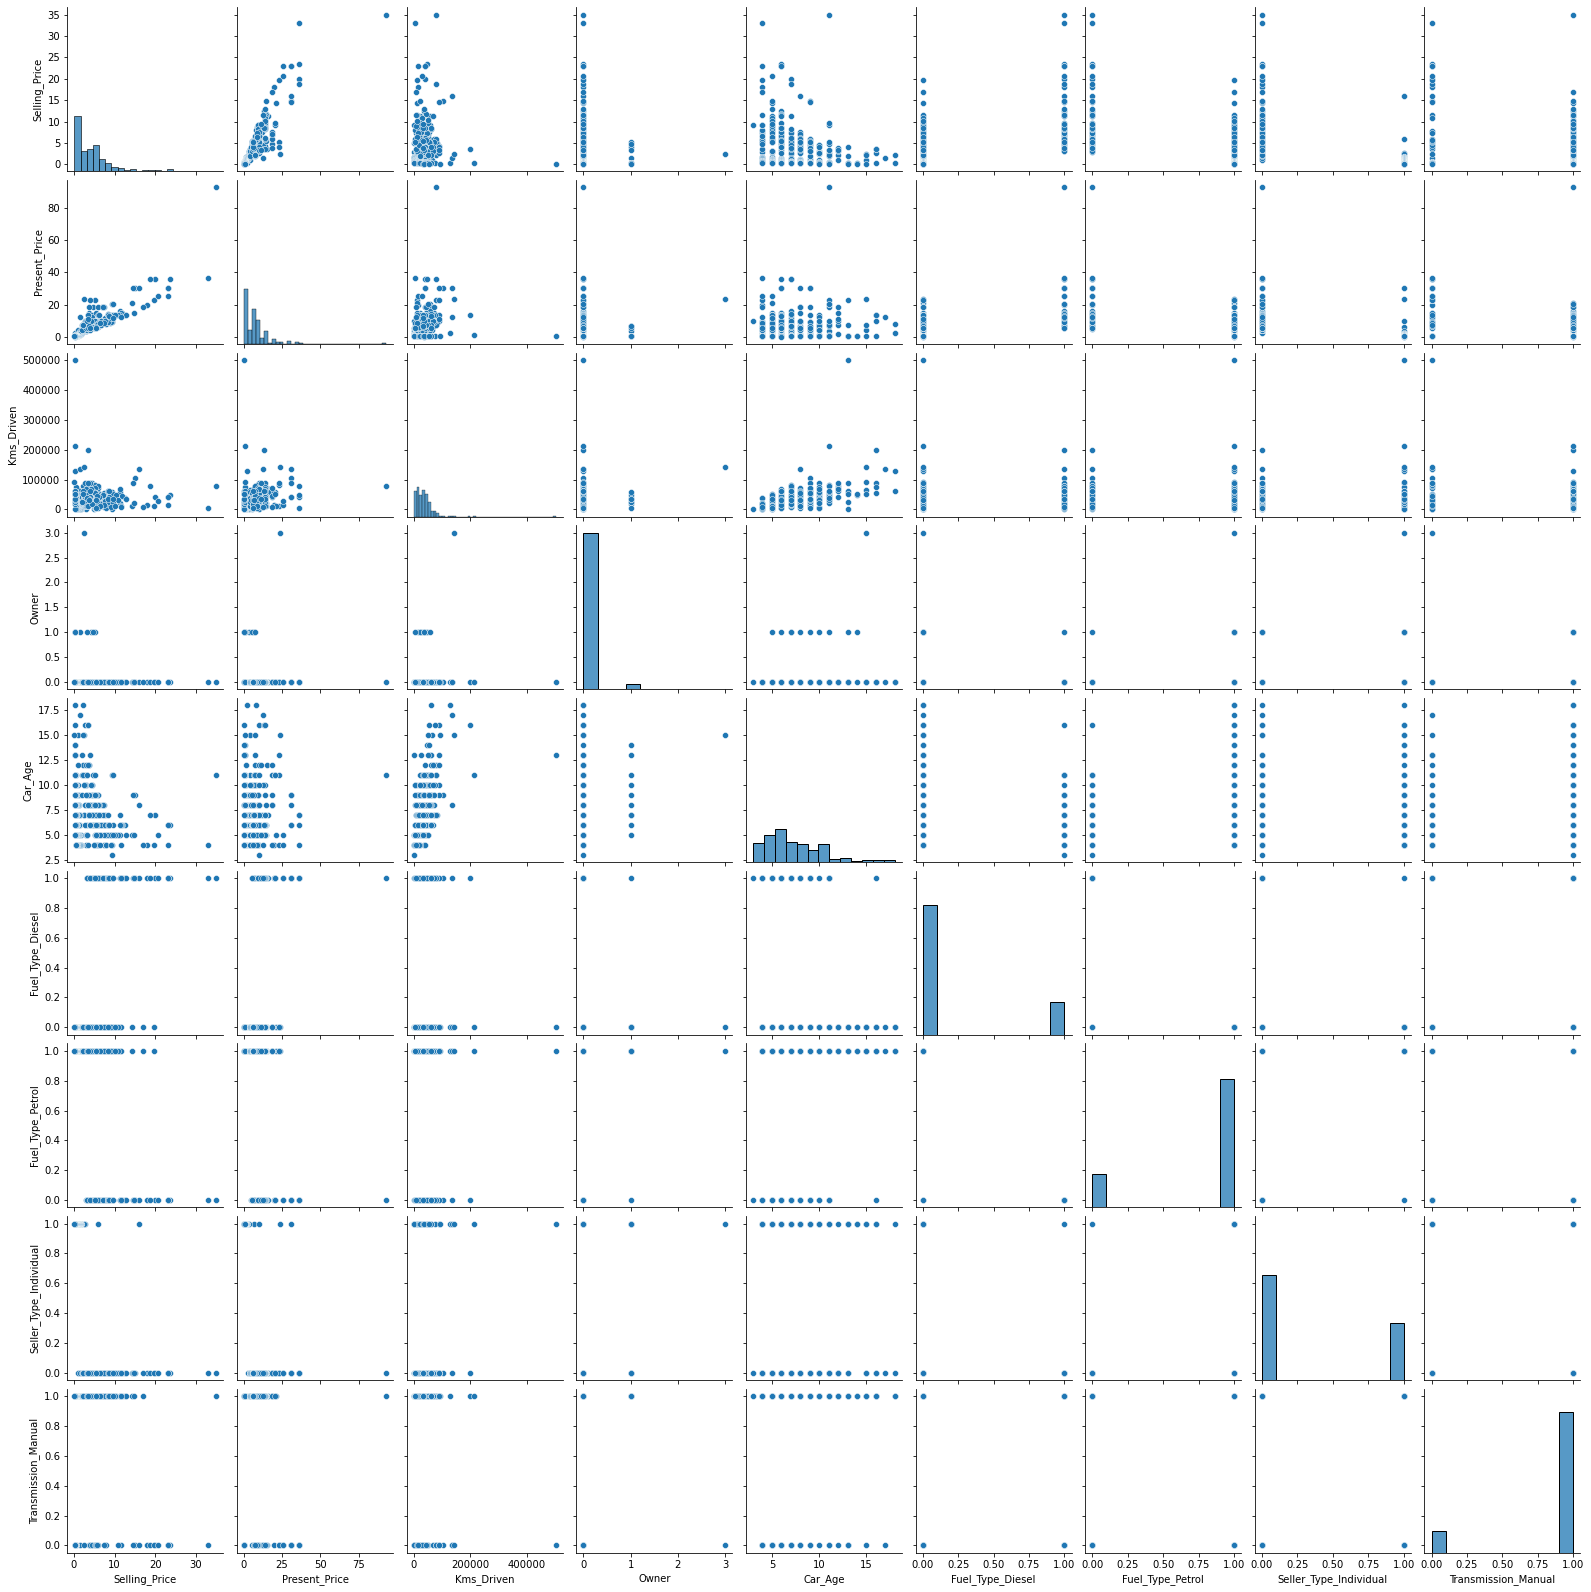

In [14]:
sns.pairplot(data)

<AxesSubplot:>

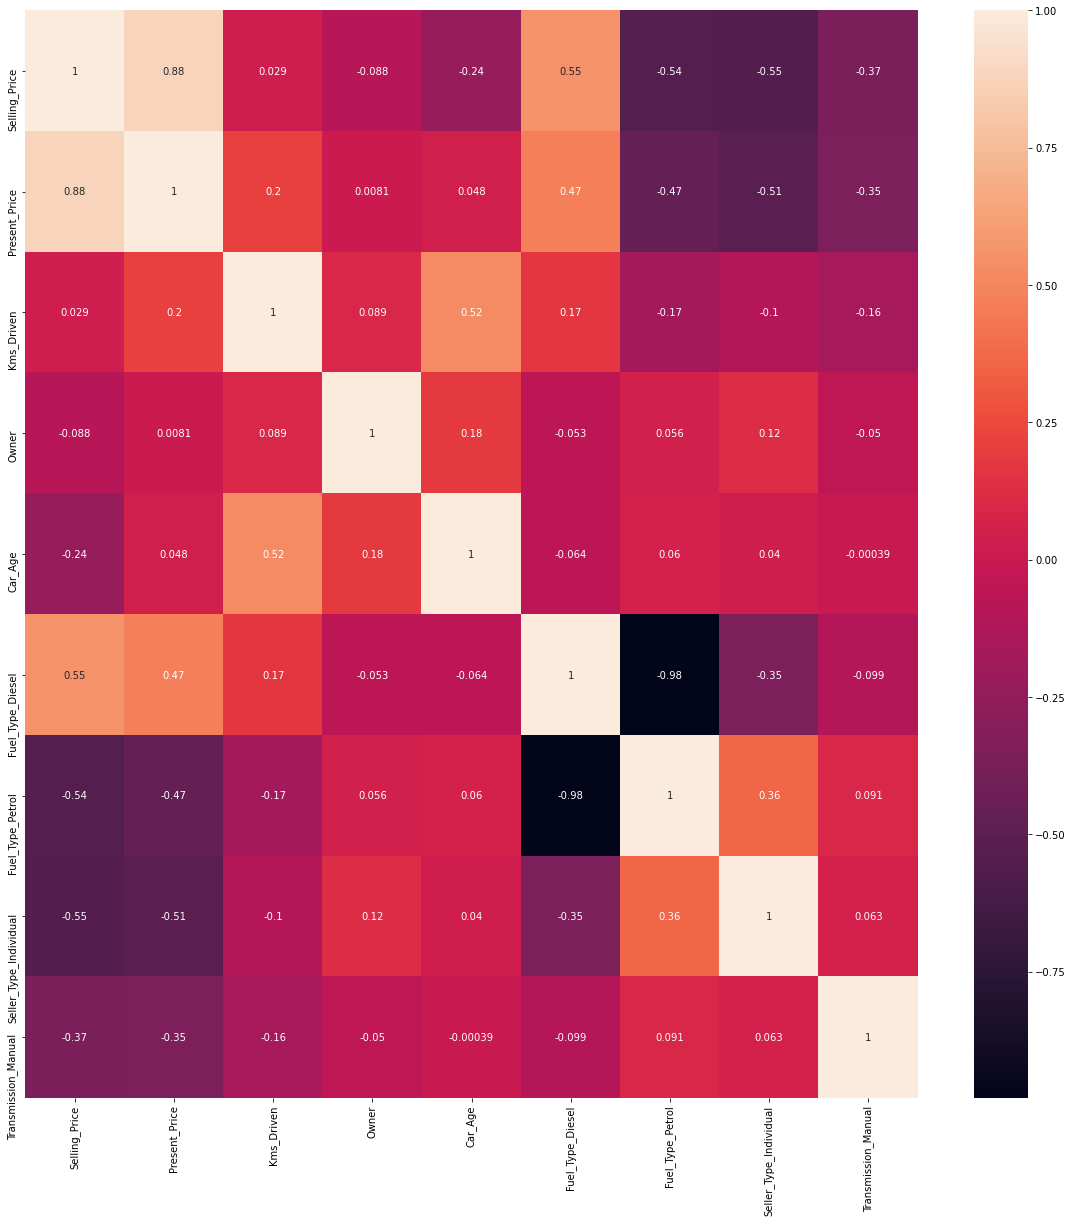

In [15]:
corrmat = data.corr()
top_corr_feature = corrmat.index
plt.figure(figsize = (20,20))
sns.heatmap(data[top_corr_feature].corr(), annot = True)

# Split The Data

In [16]:
x = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [17]:
x

,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1
...,...,...,...,...,...,...,...,...
296,11.60,33988,0,5,1,0,0,1
297,5.90,60000,0,6,0,1,0,1
298,11.00,87934,0,12,0,1,0,1
299,12.50,9000,0,4,1,0,0,1


In [18]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

# Feature Importance

In [19]:
#Feature Importance using ExtraTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x, y)

ExtraTreesRegressor()

In [20]:
print(model.feature_importances_)

[0.4238542  0.04290908 0.00052461 0.07494667 0.19750602 0.01067304
 0.12229703 0.12728936]


plot the important features

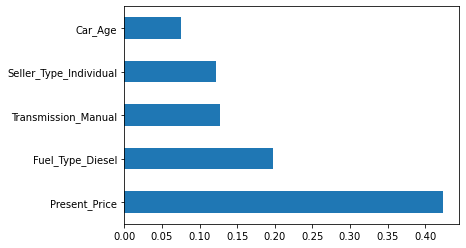

In [21]:
feat_imp = pd.Series(model.feature_importances_, index = x.columns)
feat_imp.nlargest(5).plot(kind = 'barh')
plt.show()

# Model Building

In [22]:
#Splitthe data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [23]:
x_train.shape

(240, 8)

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [26]:
from sklearn.model_selection import RandomizedSearchCV

In [27]:

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [28]:
# create model
rf = RandomForestRegressor()

In [29]:
# buildmodel with parameters
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5, verbose = 2, random_state = 42, n_jobs = 1)

In [30]:
#fit the model
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [31]:
# get the best parameters
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [32]:
# check the score
rf_random.best_score_

-3.383507902077265

In [33]:
# get the predictions on test data
predictions = rf_random.predict(x_test)

In [34]:
predictions

array([ 0.50883025,  0.23393197, 10.63146532,  0.30843446,  0.55737474,
       10.75509192,  7.52435695,  5.38311059,  3.52277355,  0.47393503,
        3.99922092,  3.4475872 ,  5.88295814, 10.04376317,  2.84661912,
        0.24184635,  3.43363813,  4.49095083, 22.9600912 ,  9.37295711,
        4.28728802,  6.77103565,  2.71635522,  0.64821878,  0.39119177,
        7.91661157,  7.73750812,  1.14488784,  0.39119177,  5.4469466 ,
        5.03716247,  0.22415273, 18.14220052,  2.840144  ,  0.409708  ,
       22.99418485,  6.99627834,  0.5164991 , 22.9600912 ,  1.26540388,
        1.14334067,  4.44425879,  4.29167332,  0.39256189,  2.97228522,
        1.25151378,  1.15720048,  1.15707472,  1.14334067,  3.83658483,
       13.6601103 ,  0.70829707, 23.00838485,  7.46216064,  2.72294923,
        5.39893473,  8.98180794,  9.99203462,  4.2720809 ,  3.21681389,
        5.32880992])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

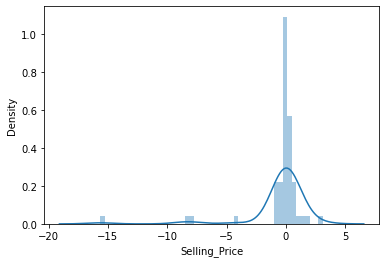

In [35]:
# plot the error
sns.distplot(y_test - predictions)

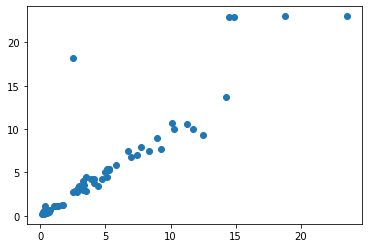

In [36]:
plt.scatter(y_test, predictions)

# Save The Model

In [37]:
import pickle

file = open('rfr_car_pred.pkl', 'wb')

pickle.dump(rf_random, file)